In [2]:
# Generate points with the model y = ax+b+e where epsilon is standard gaussian.
# x is distributed as uniform rv between [0,10]. Train a linear regression model
# with following polynomials
# • 2
# • 5
# • 10
# Study the out of sample performance for each of the above. Compare this when
# training dataset size is changed.
import numpy as np
import matplotlib.pyplot as plt

In [53]:
# y=ax + b + e
def CreateData(N):
    xData = np.random.uniform(0,10,N)
    # print("xData: ", xData)
    X=np.array(list(zip(np.ones(len(xData)),xData)))
    # print("X: ", X)
    X=X.T
    # print("X.T: ", X)
    a=1
    b=1
    W=np.array([[a],[b]])
    # print("W: ", W)
    Mean=np.dot(W.T,X)
    # print("Mean: ", Mean)
    yData=np.random.normal(Mean,1)
    # print("yData: ", yData)
    return xData, yData

def Polynomial(X,degree):
    L =[]
    for i in range(degree+1):
        L.append(X**i)
    return L

In [54]:
X_Data, Y_Data = CreateData(1000)

In [56]:

y_train = np.ones([800,1])
y_test = np.ones([200,1])

for i in range(800):
    y_train[i][0] = Y_Data[0][i]

for i in range(800,1000):
    y_test[i-800][0]= Y_Data[0][i]


x_train = np.ones(800)
x_test = np.ones(200)

for i in range(800):
    x_train[i] = X_Data[i]

for i in range(800,1000):
    x_test[i-800]= X_Data[i]


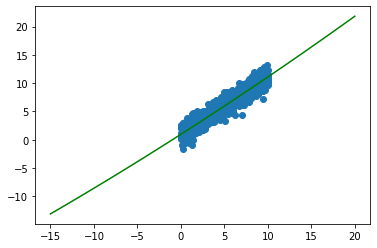

In [58]:
# Polynomial 2
L = Polynomial(x_train,2)
A = np.array(list(zip(list(L[0]),list(L[1]),list(L[2]))))
A.shape
W_2 = np.dot(np.dot(np.linalg.inv(np.dot(A.T,A)),A.T),y_train)

x = np.linspace(-15,20,100)
y = W_2[0] + W_2[1]*x + W_2[2]*x**2
plt.scatter(x_train,y_train)
plt.plot(x,y,'g')

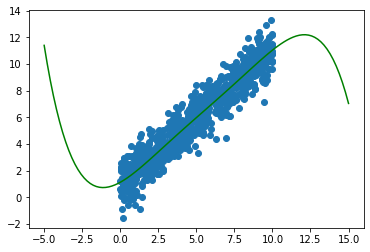

In [63]:
# Polynomial 5
L = Polynomial(x_train,5)
A = np.array(list(zip(list(L[0]),list(L[1]),list(L[2]),list(L[3]),list(L[4]),list(L[5]))))
W_5 = np.dot(np.dot(np.linalg.inv(np.dot(A.T,A)),A.T),y_train)
x = np.linspace(-5,15,100)
y = W_5[0] + W_5[1]*x + W_5[2]*x**2 + W_5[3]*x**3 + W_5[4]*x**4 + W_5[5]*x**5
plt.scatter(x_train,y_train)
plt.plot(x,y,'g')

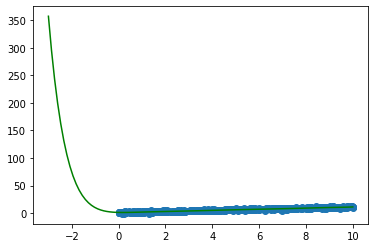

In [60]:
# Polynomial 10
L = Polynomial(x_train,10)
A = np.array(list(zip(list(L[0]),list(L[1]),list(L[2]),list(L[3]),list(L[4]),list(L[5]),list(L[6]),list(L[7]),list(L[8]),list(L[9]),list(L[10]))))
W_10 = np.dot(np.dot(np.linalg.inv(np.dot(A.T,A)),A.T),y_train)
x = np.linspace(-3,10,100)
y = W_10[0] + W_10[1]*x + W_10[2]*x**2 + W_10[3]*x**3 + W_10[4]*x**4 + W_10[5]*x**5 + W_10[6]*x**6 + W_10[7]*x**7 + W_10[8]*x**8 + W_10[9]*x**9 + W_10[10]*x**10
plt.scatter(x_train,y_train)
plt.plot(x,y,'g')

In [28]:
# Predict function with cooresponding W
def Ypred_2(X,W):
    y = W_2[0] + W_2[1]*x + W_2[2]*x**2
    return y

def Ypred_5(X,W):
    y = W_5[0] + W_5[1]*x + W_5[2]*x**2 + W_5[3]*x**3 + W_5[4]*x**4 + W_5[5]*x**5
    return y

def Ypred_10(X,W):
    y = W_10[0] + W_10[1]*x + W_10[2]*x**2 + W_10[3]*x**3 + W_10[4]*x**4 + W_10[5]*x**5 + W_10[6]*x**6 + W_10[7]*x**7 + W_10[8]*x**8 + W_10[9]*x**9 + W_10[10]*x**10
    return y

# error function
def error(yTest, yPred):
    return np.sqrt(np.mean((yTest-yPred)**2))

In [29]:
# prediction for test value for each polynomial
yPred_2 =Ypred_2(x_test,W_2)
yPred_5 = Ypred_5(x_test,W_5)
yPred_10 = Ypred_10(x_test,W_10)
# now error for each of the above
error_2 = error(y_test,yPred_2)
error_5 = error(y_test,yPred_5)
error_10 = error(y_test,yPred_10)
print('error_2 for polynomial 2: ', error_2)
print('error_5 for polynomial 5: ', error_5)
print('error_10 for polynomial 10: ', error_10)

error_2 for polynomial 2:  4.553053641184406
error_5 for polynomial 5:  4.628748985418007
error_10 for polynomial 10:  10.865738626098109


# Data Size Increase to 10,000

In [31]:
# Now lets see changes!!
# x_train, x_test = X_Data[:8], X_Data[8:]
X_Data, Y_Data = CreateData(10000)

# splitting data Train : 80 %  
            #    Test  : 20 % 
y_train = np.ones([8000,1])
y_test = np.ones([2000,1])

for i in range(8000):
    y_train[i][0] = Y_Data[0][i]

for i in range(8000,10000):
    y_test[i-8000][0]= Y_Data[0][i]


x_train = np.ones(8000)
x_test = np.ones(2000)

for i in range(8000):
    x_train[i] = X_Data[i]

for i in range(8000,10000):
    x_test[i-8000]= X_Data[i]


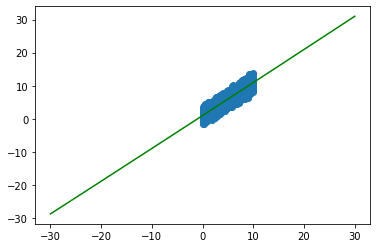

In [41]:
# Polynomial 2
L = Polynomial(x_train,2)
A = np.array(list(zip(list(L[0]),list(L[1]),list(L[2]))))
A.shape
W_2 = np.dot(np.dot(np.linalg.inv(np.dot(A.T,A)),A.T),y_train)

x = np.linspace(-30,30,100)
y = W_2[0] + W_2[1]*x + W_2[2]*x**2
plt.scatter(x_train,y_train)
plt.plot(x,y,'g')

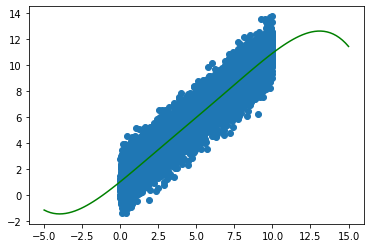

In [38]:
# Polynomial 5
L = Polynomial(x_train,5)
A = np.array(list(zip(list(L[0]),list(L[1]),list(L[2]),list(L[3]),list(L[4]),list(L[5]))))
W_5 = np.dot(np.dot(np.linalg.inv(np.dot(A.T,A)),A.T),y_train)
x = np.linspace(-5,15,100)
y = W_5[0] + W_5[1]*x + W_5[2]*x**2 + W_5[3]*x**3 + W_5[4]*x**4 + W_5[5]*x**5
plt.scatter(x_train,y_train)
plt.plot(x,y,'g')

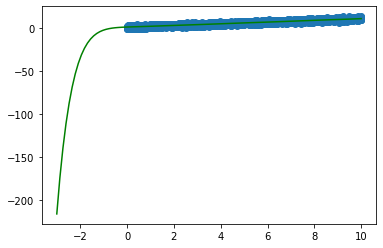

In [45]:
# Polynomial 10
L = Polynomial(x_train,10)
A = np.array(list(zip(list(L[0]),list(L[1]),list(L[2]),list(L[3]),list(L[4]),list(L[5]),list(L[6]),list(L[7]),list(L[8]),list(L[9]),list(L[10]))))
W_10 = np.dot(np.dot(np.linalg.inv(np.dot(A.T,A)),A.T),y_train)
x = np.linspace(-3,10,100)
y = W_10[0] + W_10[1]*x + W_10[2]*x**2 + W_10[3]*x**3 + W_10[4]*x**4 + W_10[5]*x**5 + W_10[6]*x**6 + W_10[7]*x**7 + W_10[8]*x**8 + W_10[9]*x**9 + W_10[10]*x**10
plt.scatter(x_train,y_train)
plt.plot(x,y,'g')

In [46]:
# Predict function with cooresponding W
def Ypred_2(X,W):
    y = W_2[0] + W_2[1]*x + W_2[2]*x**2
    return y

def Ypred_5(X,W):
    y = W_5[0] + W_5[1]*x + W_5[2]*x**2 + W_5[3]*x**3 + W_5[4]*x**4 + W_5[5]*x**5
    return y

def Ypred_10(X,W):
    y = W_10[0] + W_10[1]*x + W_10[2]*x**2 + W_10[3]*x**3 + W_10[4]*x**4 + W_10[5]*x**5 + W_10[6]*x**6 + W_10[7]*x**7 + W_10[8]*x**8 + W_10[9]*x**9 + W_10[10]*x**10
    return y

# error function
def error(yTest, yPred):
    return np.sqrt(np.mean((yTest-yPred)**2))

In [47]:
# prediction for test value for each polynomial
yPred_2 =Ypred_2(x_test,W_2)
yPred_5 = Ypred_5(x_test,W_5)
yPred_10 = Ypred_10(x_test,W_10)
# now error for each of the above
error_2 = error(y_test,yPred_2)
error_5 = error(y_test,yPred_5)
error_10 = error(y_test,yPred_10)
print('error_2 for polynomial 2: ', error_2)
print('error_5 for polynomial 5: ', error_5)
print('error_10 for polynomial 10: ', error_10)

error_2 for polynomial 2:  5.053996888011586
error_5 for polynomial 5:  4.9682506226087275
error_10 for polynomial 10:  37.75399378564292


As it is visible increasing n value, error for corresponding polynomial increases !! Hence, Overall Error will increase with n increase !! 

In [ ]:
2.